In [44]:
import tensorflow.keras.models as Models
from tensorflow.keras.models import Model
import tensorflow.keras.layers as Layers
import tensorflow.keras.optimizers as Optimizer
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2
from random import randint

from sklearn.metrics import confusion_matrix
import seaborn as sn
import tensorflow as tf
import zipfile
import os

In [48]:
# Importando dataset
!wget -nc --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1r9gkVo2_04_wgL1EuZ2Y1WbeORrG15ng' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1r9gkVo2_04_wgL1EuZ2Y1WbeORrG15ng" -O intel-image-classification-1.zip && rm -rf /tmp/cookies.txt
local_zip = '/content/intel-image-classification-1.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

--2021-08-26 18:37:28--  https://docs.google.com/uc?export=download&confirm=ugL8&id=1r9gkVo2_04_wgL1EuZ2Y1WbeORrG15ng
Resolving docs.google.com (docs.google.com)... 172.217.204.113, 172.217.204.139, 172.217.204.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-7s-docs.googleusercontent.com/docs/securesc/2vit0nrh780s3kf88teq3bmbjg4ntq7u/jmvekdb1ueqjhrs0gi9iji0695nrjb5c/1630002975000/05209603873761119410/04629085718367708422Z/1r9gkVo2_04_wgL1EuZ2Y1WbeORrG15ng?e=download [following]
--2021-08-26 18:37:28--  https://doc-00-7s-docs.googleusercontent.com/docs/securesc/2vit0nrh780s3kf88teq3bmbjg4ntq7u/jmvekdb1ueqjhrs0gi9iji0695nrjb5c/1630002975000/05209603873761119410/04629085718367708422Z/1r9gkVo2_04_wgL1EuZ2Y1WbeORrG15ng?e=download
Resolving doc-00-7s-docs.googleusercontent.com (doc-00-7s-docs.googleusercontent.com)... 74.125.139.132, 2607:f8b0:400c:c05::84
Connec

In [64]:
def get_images_labels(directory):
  Images = []
  Labels = []
  label = 0

  for labels in os.listdir(directory):
    if labels == 'glacier':
      label = 2
    elif labels == 'sea':
      label = 4
    elif labels == 'buildings':
      label = 0
    elif labels == 'forest':
      label = 1
    elif labels == 'street':
      label = 5
    elif labels == 'mountain':
      label = 3
    
    for image_file in os.listdir(directory+labels):
      image = cv2.imread(directory+labels+r'/'+image_file)
      image = cv2.resize(image,(150,150))
      Images.append(image)
      Labels.append(label)
  
  return (Images,Labels)

In [95]:
def get_images(directory):
  Images = []

  for image_file in os.listdir(directory):
    image = cv2.imread(directory+'/'+image_file)
    image = cv2.resize(image,(150,150))
    Images.append(image)
  
  return (Images)

In [96]:
def get_classlabel(class_code):
  labels = {2:'glacier',4:'sea',0:'buildings',1:'forest',5:'street',3:'mountain'}

  return labels[class_code]

In [97]:
def plot_images():

  Images, Labels = get_images_labels('/content/intel-image-classification-1/seg_train/seg_train/')

  Images = np.array(Images)
  Labels = np.array(Labels)

  f,ax = plt.subplots(5,5, figsize=(10,10))
  for i in range(0,5,1):
    for j in range(0,5,1):
      index = randint(0,len(Images))
      ax[i,j].imshow(Images[index])
      ax[i,j].set_title(get_classlabel(Labels[index]))
      ax[i,j].axis('off')
  f.tight_layout(pad=1.0)
  plt.show()

In [98]:
def pie_plot():

  class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

  Images, Labels = get_images_labels('/content/intel-image-classification-1/seg_train/seg_train/')
  Labels = np.array(Labels)

  sizes = np.bincount(Labels)
  explode = (0, 0, 0, 0, 0, 0)
  plt.pie(sizes, explode=explode, labels=class_names, autopct='%1.1f', shadow=True, startangle=150)
  plt.axis('equal')
  plt.title('Porcentagem de Imagens por Categoria')

  plt.show()

In [99]:
def get_Model_Sequential_Completo():

  model = Models.Sequential()

  model.add(Layers.Conv2D(200,kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
  model.add(Layers.Conv2D(180,kernel_size=(3,3), activation='relu'))
  model.add(Layers.MaxPool2D(5,5))
  model.add(Layers.Conv2D(180,kernel_size=(3,3), activation='relu'))
  model.add(Layers.Conv2D(140,kernel_size=(3,3), activation='relu'))
  model.add(Layers.Conv2D(100,kernel_size=(3,3), activation='relu'))
  model.add(Layers.Conv2D(50,kernel_size=(3,3), activation='relu'))
  model.add(Layers.MaxPool2D(5,5))
  model.add(Layers.Flatten())
  model.add(Layers.Dense(180,activation='relu'))
  model.add(Layers.Dense(100,activation='relu'))
  model.add(Layers.Dense(50,activation='relu'))
  model.add(Layers.Dropout(rate=0.5))
  model.add(Layers.Dense(6,activation='softmax'))

  model.compile(Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  model.summary()

  return model


In [100]:
def plot_Model_Sequential_Completo():

  model = get_Model_Sequential_Completo()

  plot_model(model,to_file='modelo_completo.png',show_shapes=True,dpi=300)

  model_image = cv2.imread('modelo_completo.png')
  model_image_np = np.array(model_image)

  f,ax = plt.subplots(1,1, figsize=(10,50))
  ax.imshow(model_image_np)
  ax.set_title('Modelo Completo')
  ax.axis('off')
  plt.show()

In [107]:
def fit_Model_Sequential_Completo():

  Images, Labels = get_images_labels('/content/intel-image-classification-1/seg_train/seg_train/')

  Images = np.array(Images)
  Labels = np.array(Labels)

  np.random.shuffle(Images)
  np.random.shuffle(Labels)

  few_images = Images[1:300]
  few_labels = Labels[1:300]

  model = get_Model_Sequential_Completo()

  trained = model.fit(few_images,few_labels,batch_size=10,epochs=4,validation_split=0.30)

  model.save('model/first')
  model.save_weights('model/first')

  plt.plot(trained.history['accuracy'])
  plt.plot(trained.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [120]:
def predict_Model_Sequential_Completo():
  
  model = get_Model_Sequential_Completo()

  model.load_weights('model/first')

  pred_images = get_images('/content/intel-image-classification-1/seg_pred/seg_pred/')
  pred_images = np.array(pred_images)

  fig = plt.figure(figsize=(60, 60))
  outer = matplotlib.gridspec.GridSpec(3, 3, wspace=0.4, hspace=0.4)

  for i in range(9):
    inner = matplotlib.gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0, len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    predict_classes = model.predict(pred_image)
    arg = np.argmax(predict_classes, axis=1)[0]
    pred_class = get_classlabel(arg)
    pred_prob = predict_classes.reshape(6)
    for j in range(2):
      if (j%2) == 0:
        ax = plt.Subplot(fig, inner[j])
        ax.imshow(pred_image[0])
        ax.set_title(pred_class, fontsize=20.0)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
      else:
        ax = plt.Subplot(fig, inner[j])
        ax.bar([get_classlabel(0),get_classlabel(1),get_classlabel(2),get_classlabel(3),get_classlabel(4),get_classlabel(5)],pred_prob)
        #ax.set_xlabel(fontsize=10.0)
        fig.add_subplot(ax)

  plt.show()

In [122]:
def evaluate_Model_Sequential_Completo():

  test_images,test_labels = get_images_labels('/content/intel-image-classification-1/seg_test/seg_test/')

  test_images = np.array(test_images)
  test_labels = np.array(test_labels)

  few_images = test_images[1:100]
  few_labels = test_labels[1:100]

  model = get_Model_Sequential_Completo()

  model.load_weights('model/first')

  model.evaluate(few_images,few_labels, verbose=1)

In [104]:
def plot_confusion_matrix():

  class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

  model = get_Model_Sequential_Completo()

  model.load_weights('model/first')

  test_images,test_labels = get_images_labels('/content/intel-image-classification-1/seg_test/seg_test/')

  test_images = np.array(test_images)
  test_labels = np.array(test_labels)

  #few_images = test_images[1:100]
  #few_labels = test_labels[1:100]

  test_prob = model.predict(test_images)

  pred_labels = np.argmax(test_prob, axis=1)

  CM = confusion_matrix(test_labels, pred_labels)
  ax = plt.axes()
  sn.set(font_scale=1.4)
  sn.heatmap(CM, annot=False, annot_kws={"size: 16"}, xticklabels=class_names, yticklabels=class_names, ax=ax)
  ax.set_title('Confusion Matrix')
  plt.show()

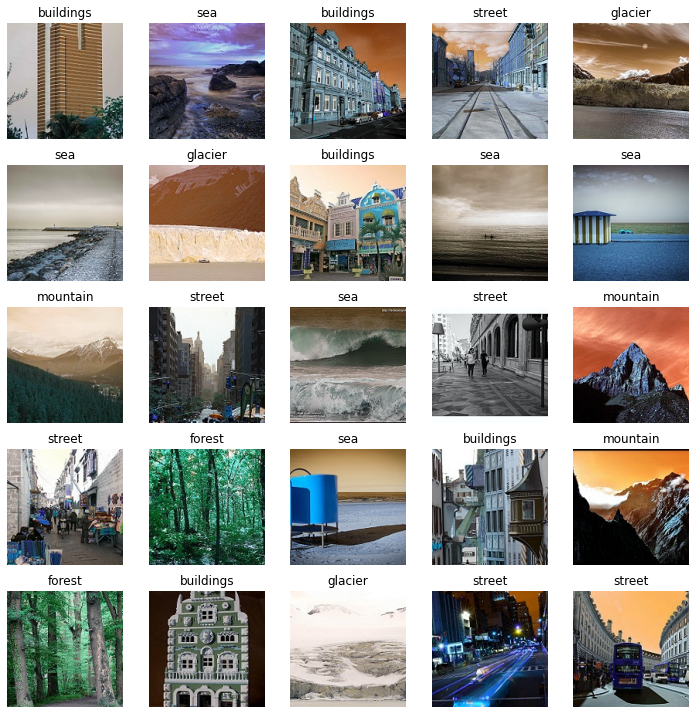

In [91]:
plot_images()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 21, 21, 50)       

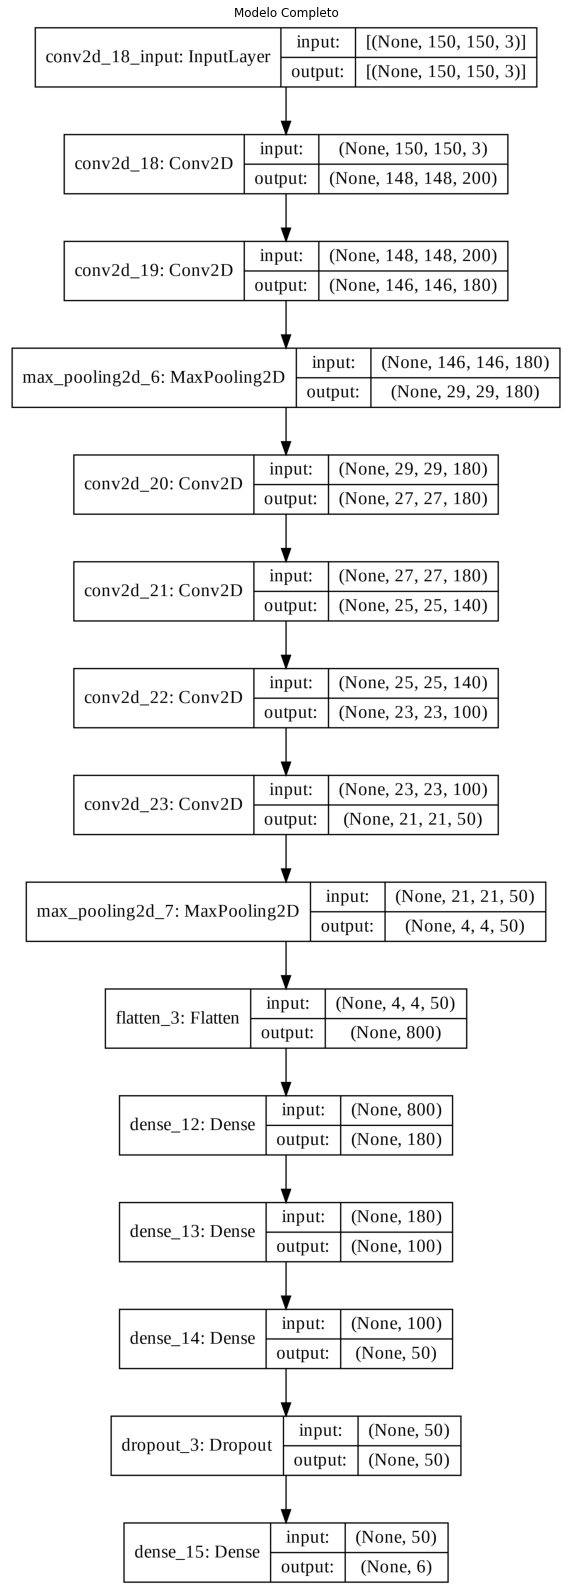

In [93]:
plot_Model_Sequential_Completo()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 21, 21, 50)       

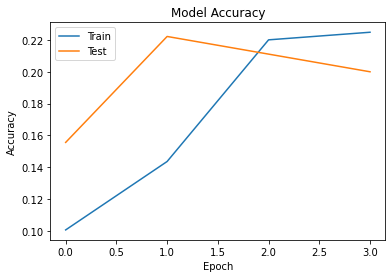

In [108]:
fit_Model_Sequential_Completo()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 21, 21, 50)      

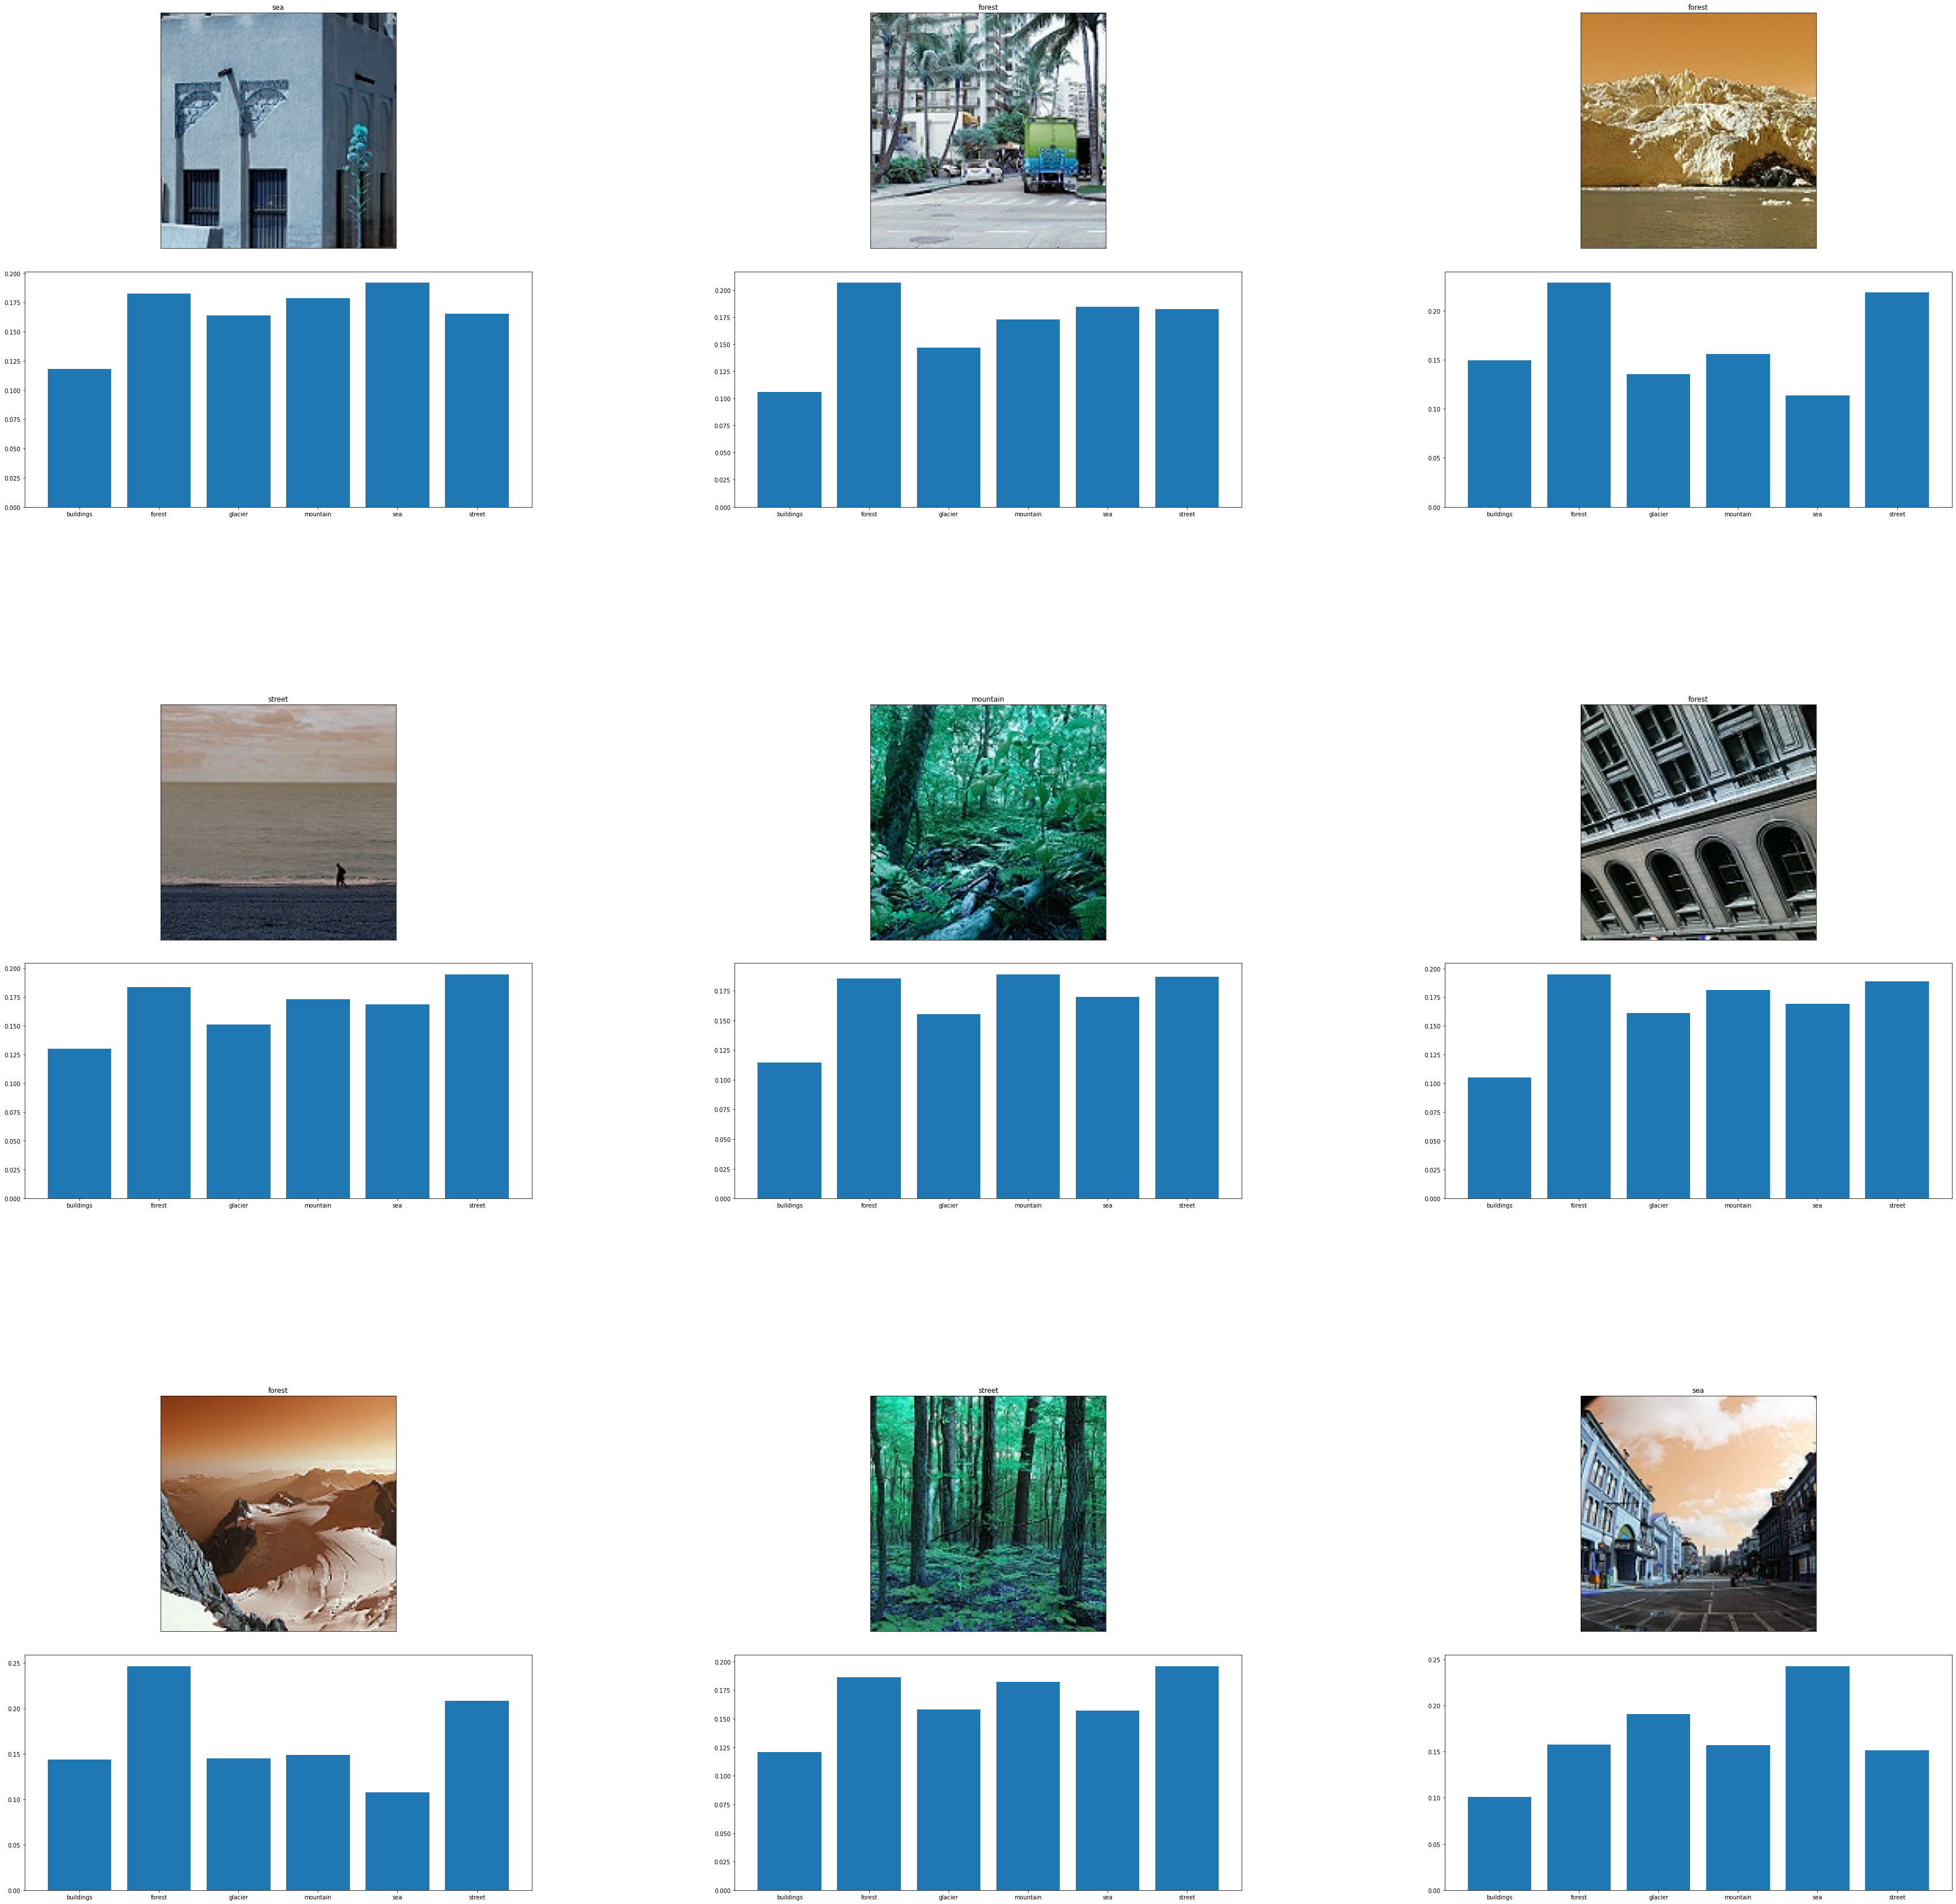

In [121]:
predict_Model_Sequential_Completo()

In [124]:
evaluate_Model_Sequential_Completo()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 21, 21, 50)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 21, 21, 50)      

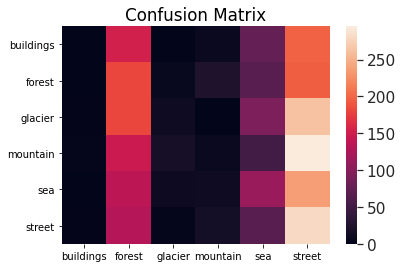

In [123]:
plot_confusion_matrix()